In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

# Transfer function

In [67]:
def get_TF(bdf, base_freq):
    ''' Load all files in directory to a list of BeadDataFile
        INPUTS: BeadDataFile - with the transfer function data, 
                base frequancy - of the transfer function measurement
        OUTPUT: matrix with the response of each axis per frequancy'''
    axes = ['x','y','z']
    freq, psd = bdf.psd2('x')
    resp = np.array([bdf.psd2(axes_)[1] for axes_ in axes])
    relevant_freq = freq%base_freq==0
    return (resp.T[relevant_freq].T)

In [99]:
fname = r'/data/new_trap/20190701/Bead2/TransFunc/TransFuncX_1.h5'
bdX = BeadDataFile.BeadDataFile(fname)

No cantilever data


<IPython.core.display.Javascript object>


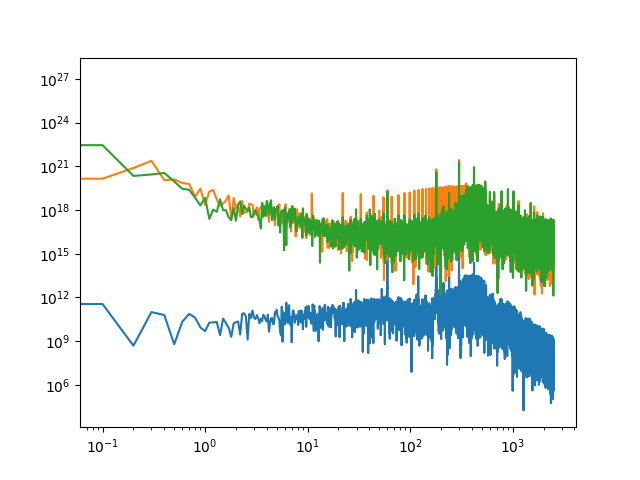

In [100]:
_,ax = plt.subplots()
ax.loglog(*bdX.psd2('z'))

x = bdX.quad_sum
fft1 = np.abs(np.fft.rfft(x))**2
freq1 = np.fft.rfftfreq(len(x), d=1./5000)
ax.loglog(freq,fft)
ax.loglog(freq1,fft1)

In [52]:
ax.plot(freq[freq%11==0],psdX[freq%11==0])

In [58]:
responseX = psdX[freq%11==0]
np.array([responseX, responseX])[0]

In [60]:
axes = ['x','y','z']
respX = np.array([bdX.psd2(axes_)[1] for axes_ in axes])

In [61]:
respX.shape

(3, 25001)

In [92]:
tfX = get_TF(bdf=bdX, base_freq=11)

<IPython.core.display.Javascript object>


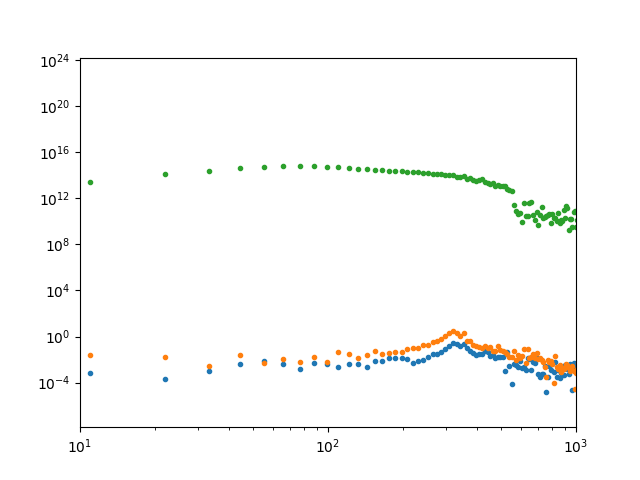

[(10, 1000)]

In [93]:
_,ax = plt.subplots()
[ax.loglog(np.arange(0,11*len(tfX[0]),11),tfX[i], '.') for i in range(3)]
ax.set(xlim=(10,1000))